In [4]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Dekoherencja

In [50]:
circ = QuantumCircuit(1)

In [51]:
circ.x(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)

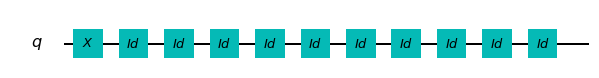

In [52]:
circ.draw()

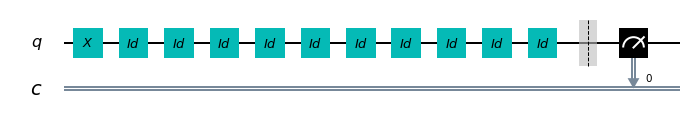

In [53]:
meas = QuantumCircuit(1,1)
meas.barrier(range(1))
meas.measure(range(1), range(1))

qc = circ+meas
qc.draw()

In [54]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()

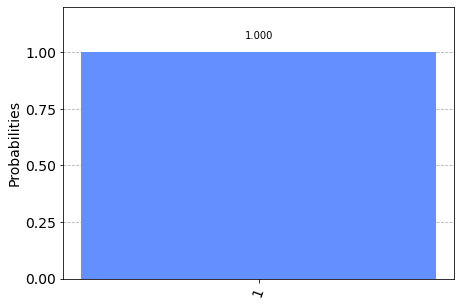

In [55]:
counts = result_sim.get_counts(qc)
plot_histogram(counts)

In [57]:
backend = provider.get_backend('ibmq_essex')

In [59]:
from qiskit.tools.monitor import job_monitor

job_exp = execute(qc, backend=backend)

In [60]:
job_monitor(job_exp)

Job Status: job has successfully run


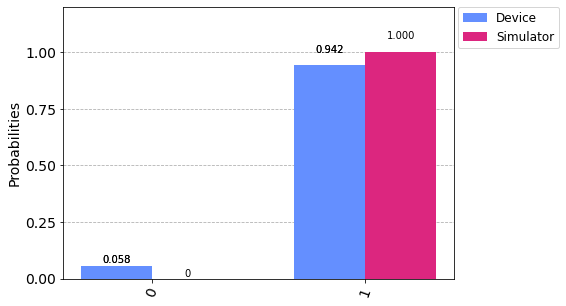

In [61]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

# Różnice

In [5]:
circ2 = QuantumCircuit(2)

In [6]:
circ2.h(0)
circ2.x(1)
circ2.cx(0, 1)

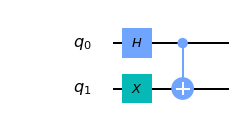

In [7]:
circ2.draw()

## Amplitudy i macierz gęstości

In [16]:
backend = Aer.get_backend('statevector_simulator')

[0.   +0.j 0.707+0.j 0.707+0.j 0.   +0.j]


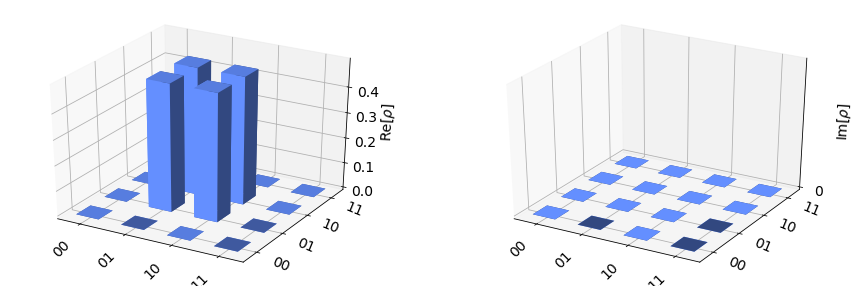

In [17]:
job = execute(circ2, backend)
result = job.result()
outputstate = result.get_statevector(circ2, decimals=3)
print(outputstate)
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

Jeśli za wektor amplitud przyjmiejmy |x>, to macierz gęstości ma postać |x><x|.  
Macierz gęstości wyliczona ze wzoru ma postać:
    $$M = \begin{pmatrix} 0 & 0 & 0 & 0 \\  0 & \frac{1}{2} & \frac{1}{2} & 0 \\ 0 & \frac{1}{2} & \frac{1}{2} & 0 \\ 0 & 0 & 0 & 0 \\\end{pmatrix}.$$
Czyli zgadza się z wykresem
    

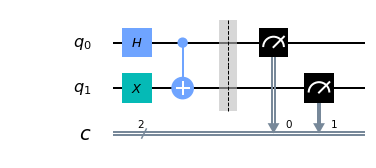

In [18]:
meas2 = QuantumCircuit(2,2)
meas2.barrier(range(2))
meas2.measure(range(2), range(2))

qc2 = circ2+meas2
qc2.draw()

In [19]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc2, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc2)

In [20]:
backend = provider.get_backend('ibmq_essex')

In [21]:
from qiskit.tools.monitor import job_monitor

job_exp = execute(qc2, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [22]:
result_exp = job_exp.result()

## Histogramy dla symulacji i rzeczywistej maszyny

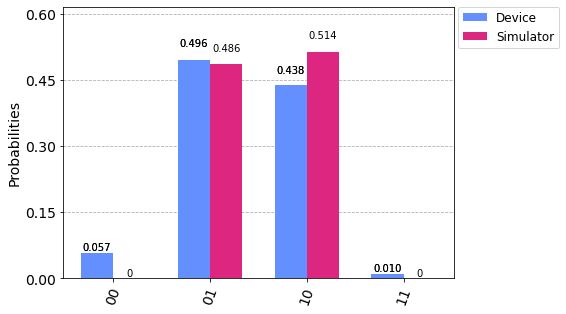

In [24]:
counts_exp = result_exp.get_counts(qc2)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

Różnice między macierzą gęstości, a histogramem symulacji biorą się z tego, że eksperyment jest wykonywany wiele razy (tutaj 1024), a prawdopodobieńswto to po prostu ile razy wyjście jest w danym stanie.  
Macierz pokazuje rzeczywiste prawdopodobieństwo, że wyjście będzie w danym stanie.

Histogram dla rzeczywistej maszyny jest dodatkowo zaburzony dekoherencje.